# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span></li><li><span><a href="#Find-Common-Date-Span" data-toc-modified-id="Find-Common-Date-Span-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find Common Date Span</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize the dependencies</a></span><ul class="toc-item"><li><span><a href="#Preview-Content" data-toc-modified-id="Preview-Content-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preview Content</a></span></li></ul></li></ul></div>

## Set Up

In [20]:
dir="../Data/processed/"

dataset_file_name = "uber.csv"

file1 = "^DJI.csv"
file2 = "united-states.ism-manufacturing-employment.csv"
file3 = "united-states.housing-starts-mm.csv"
file4 = "united-states.ism-manufacturing-pmi.csv"
file5 = "^VIX.csv"


include("../Julia/functions.jl") 
println()

## Fetch Data

In [2]:
df1 = fetch_dataset( file1 , "yyyy-mm-dd", dir )

using Statistics
describe(df1)

Fetched and sorted by date ../Data/processed/^DJI.csv, record count 13094


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731216.0,724670,731216.0,737763,,,Int64
2,Date,,1985-01-29,,2020-12-04,13094,,Date
3,Value,-48.0364,-128.0,-49.0,127.0,,,Float64
4,Original,10334.4,1251.21,10204.2,30218.3,,,Float64
5,Avg005,-48.0361,-128.0,-49.2,125.6,,,Float64
6,Avg030,-48.0317,-128.0,-48.93,121.6,,,Float64
7,Avg090,-47.9942,-127.97,-48.435,114.44,,,Float64
8,Avg180,-47.9197,-127.66,-48.6,107.44,,,Float64
9,Avg365,-47.6657,-127.01,-48.63,100.01,,,Float64


In [3]:
df2 = fetch_dataset( file2 , "yyyy-mm-dd", dir )

using Statistics
describe(df2)

Fetched and sorted by date ../Data/processed/united-states.ism-manufacturing-employment.csv, record count 2588


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,736466.0,735173,736466.0,737760,,,Int64
2,Date,,2013-11-01,,2020-12-01,2588,,Date
3,Value,64.3284,-128.0,69.0,127.0,,,Float64
4,Original,52.2338,27.5,52.8,60.3,,,Float64
5,Avg005,64.2289,-128.0,69.0,127.0,,,Float64
6,Avg030,63.5358,-128.0,69.9,127.0,,,Float64
7,Avg090,61.9303,-79.27,72.535,124.68,,,Float64
8,Avg180,60.2937,-36.78,69.355,114.71,,,Float64
9,Avg365,58.5138,-8.1,65.16,106.14,,,Float64


In [4]:
df3 = fetch_dataset( file3 , "yyyy-mm-dd", dir )

using Statistics
describe(df3)

Fetched and sorted by date ../Data/processed/united-states.housing-starts-mm.csv, record count 1820


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,736884.0,735975,736884.0,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64
5,Avg030,11.4666,-126.8,10.8,121.73,,,Float64
6,Avg060,11.2269,-109.4,11.165,101.5,,,Float64
7,Avg090,10.9995,-74.04,11.68,78.98,,,Float64
8,Avg180,9.87997,-17.92,10.31,45.62,,,Float64
9,Avg365,8.77227,-3.9,10.015,21.17,,,Float64


In [5]:
df4 = fetch_dataset( file4 , "yyyy-mm-dd", dir )

using Statistics
describe(df3)

Fetched and sorted by date ../Data/processed/united-states.ism-manufacturing-pmi.csv, record count 4996


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,736884.0,735975,736884.0,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64
5,Avg030,11.4666,-126.8,10.8,121.73,,,Float64
6,Avg060,11.2269,-109.4,11.165,101.5,,,Float64
7,Avg090,10.9995,-74.04,11.68,78.98,,,Float64
8,Avg180,9.87997,-17.92,10.31,45.62,,,Float64
9,Avg365,8.77227,-3.9,10.015,21.17,,,Float64


In [6]:
df5 = fetch_dataset( file5 , "yyyy-mm-dd", dir )

using Statistics
describe(df3)

Fetched and sorted by date ../Data/processed/^VIX.csv, record count 11295


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,736884.0,735975,736884.0,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64
5,Avg030,11.4666,-126.8,10.8,121.73,,,Float64
6,Avg060,11.2269,-109.4,11.165,101.5,,,Float64
7,Avg090,10.9995,-74.04,11.68,78.98,,,Float64
8,Avg180,9.87997,-17.92,10.31,45.62,,,Float64
9,Avg365,8.77227,-3.9,10.015,21.17,,,Float64


## Find Common Date Span

Example:
- for all the DataFrames
- find lowest dates
- select the highest (common) of them

In [7]:
using Dates

function format_rata_die_to_us_date(d)
    return Dates.format( rata2datetime(d) , "u. d, yyyy")
end

format_rata_die_to_us_date (generic function with 1 method)

In [8]:
oldest_common_day = maximum([
        minimum(df1[:,1]) 
        ,minimum(df2[:,1]) 
        ,minimum(df3[:,1])
        ,minimum(df4[:,1])
        ,minimum(df5[:,1])
        ])


println("Oldest common day for df1 is ", format_rata_die_to_us_date( minimum(df1[:,1]))  )
println("Oldest common day for df2 is ", format_rata_die_to_us_date( minimum(df2[:,1]))  )
println("Oldest common day for df3 is ", format_rata_die_to_us_date( minimum(df3[:,1]))  )
println("Oldest common day for df4 is ", format_rata_die_to_us_date( minimum(df4[:,1]))  )
println("Oldest common day for df5 is ", format_rata_die_to_us_date( minimum(df5[:,1]))  )

println("Oldest common day is ", format_rata_die_to_us_date(oldest_common_day) )

Oldest common day for df1 is Jan. 29, 1985
Oldest common day for df2 is Nov. 1, 2013
Oldest common day for df3 is Jan. 12, 2016
Oldest common day for df4 is Mar. 1, 2007
Oldest common day for df5 is Jan. 2, 1990
Oldest common day is Jan. 12, 2016


In [9]:
newest_common_day = minimum([
        maximum(df1[:,1])
        , maximum(df2[:,1])
        , maximum(df3[:,1])
        , maximum(df4[:,1])
        , maximum(df5[:,1])
        ])

println("Newest common day for df1 is ", format_rata_die_to_us_date( maximum(df1[:,1]))  )
println("Newest common day for df2 is ", format_rata_die_to_us_date( maximum(df2[:,1]))  )
println("Newest common day for df3 is ", format_rata_die_to_us_date( maximum(df3[:,1]))  )
println("Newest common day for df4 is ", format_rata_die_to_us_date( maximum(df4[:,1]))  )
println("Newest common day for df5 is ", format_rata_die_to_us_date( maximum(df5[:,1]))  )

println("Newest common day is ", format_rata_die_to_us_date(newest_common_day) )

Newest common day for df1 is Dec. 4, 2020
Newest common day for df2 is Dec. 1, 2020
Newest common day for df3 is Jan. 4, 2021
Newest common day for df4 is Nov. 2, 2020
Newest common day for df5 is Dec. 4, 2020
Newest common day is Nov. 2, 2020


In [10]:
df1_min_id = find_day(df1, oldest_common_day)
df1_max_id = find_day(df1, newest_common_day)
df1_rows_range = df1_min_id:df1_max_id

11306:13062

In [11]:
df2_min_id = find_day(df2, oldest_common_day)
df2_max_id = find_day(df2, newest_common_day)
df2_rows_range = df2_min_id:df2_max_id

803:2559

In [21]:
df3_min_id = find_day(df3, oldest_common_day)
df3_max_id = find_day(df3, newest_common_day)
df3_rows_range = df3_min_id:df3_max_id

1:1757

In [13]:
df4_min_id = find_day(df4, oldest_common_day)
df4_max_id = find_day(df4, newest_common_day)
df4_rows_range = df4_min_id:df4_max_id

3240:4996

In [14]:
df5_min_id = find_day(df5, oldest_common_day)
df5_max_id = find_day(df5, newest_common_day)
df5_rows_range = df5_min_id:df5_max_id

9507:11263

In [22]:
using DataFrames
uber_df = DataFrame(  Day                   = df1[df1_rows_range,1] 
                     ,Date                  = df1[df1_rows_range,2] 
                     ,DJIA_Value            = df1[df1_rows_range,3] 
                     ,DJIA_Original         = df1[df1_rows_range,4] 
                     ,DJIA_Avg005           = df1[df1_rows_range,5] 
                     ,DJIA_Avg030           = df1[df1_rows_range,6] 
                     ,DJIA_Avg090           = df1[df1_rows_range,7] 
                     ,DJIA_Avg180           = df1[df1_rows_range,8] 
                     ,DJIA_Avg365           = df1[df1_rows_range,9]
    
                     ,ISM_MFC_EMP_Value     = df2[df2_rows_range,3]
                     ,ISM_MFC_EMP_Original  = df2[df2_rows_range,4] 
                     ,ISM_MFC_EMP_Avg090    = df2[df2_rows_range,7] 
                     ,ISM_MFC_EMP_Avg180    = df2[df2_rows_range,8] 
                     ,ISM_MFC_EMP_Avg365    = df2[df2_rows_range,9]
    
                     ,HOUSE_SRT_MM_Value    = df3[df3_rows_range,3]
                     ,HOUSE_SRT_MM_Original = df3[df3_rows_range,4] 
                     ,HOUSE_SRT_MM_Avg090   = df3[df3_rows_range,5] 
                     ,HOUSE_SRT_MM_Avg180   = df3[df3_rows_range,6] 
                     ,HOUSE_SRT_MM_Avg365   = df3[df3_rows_range,7]
    
                     ,MFC_MPI_Value         = df4[df4_rows_range,3]
                     ,MFC_MPI_Original      = df4[df4_rows_range,4] 
                     ,MFC_MPI_Avg090        = df4[df4_rows_range,5] 
                     ,MFC_MPI_Avg180        = df4[df4_rows_range,6] 
                     ,MFC_MPI_Avg365        = df4[df4_rows_range,7]
    
    
                     ,VIX_Value             = df5[df5_rows_range,3] 
                     ,VIX_Original          = df5[df5_rows_range,4] 
                     ,VIX_Avg005            = df5[df5_rows_range,5] 
                     ,VIX_Avg030            = df5[df5_rows_range,6] 
                     ,VIX_Avg090            = df5[df5_rows_range,7] 
                     ,VIX_Avg180            = df5[df5_rows_range,8] 
                     ,VIX_Avg365            = df5[df5_rows_range,9] 
                   )

using Statistics
describe(uber_df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Day,736853.0,735975,736853.0,737731,,
2,Date,,2016-01-12,,2020-11-02,1757,
3,DJIA_Value,68.3142,1.0,78.0,121.0,,
4,DJIA_Original,23550.7,15897.8,24646.4,29568.6,,
5,DJIA_Avg005,68.2124,1.8,77.8,120.4,,
6,DJIA_Avg030,67.5432,3.87,77.47,118.07,,
7,DJIA_Avg090,65.9734,8.59,78.31,114.44,,
8,DJIA_Avg180,63.7219,10.94,79.93,107.44,,
9,DJIA_Avg365,59.8717,13.7,69.59,100.01,,


## Visualize the dependencies

In [23]:
columns = print_colunms(uber_df)
println()

1 Day
2 Date
3 DJIA_Value
4 DJIA_Original
5 DJIA_Avg005
6 DJIA_Avg030
7 DJIA_Avg090
8 DJIA_Avg180
9 DJIA_Avg365
10 ISM_MFC_EMP_Value
11 ISM_MFC_EMP_Original
12 ISM_MFC_EMP_Avg090
13 ISM_MFC_EMP_Avg180
14 ISM_MFC_EMP_Avg365
15 HOUSE_SRT_MM_Value
16 HOUSE_SRT_MM_Original
17 HOUSE_SRT_MM_Avg090
18 HOUSE_SRT_MM_Avg180
19 HOUSE_SRT_MM_Avg365
20 MFC_MPI_Value
21 MFC_MPI_Original
22 MFC_MPI_Avg090
23 MFC_MPI_Avg180
24 MFC_MPI_Avg365
25 VIX_Value
26 VIX_Original
27 VIX_Avg005
28 VIX_Avg030
29 VIX_Avg090
30 VIX_Avg180
31 VIX_Avg365



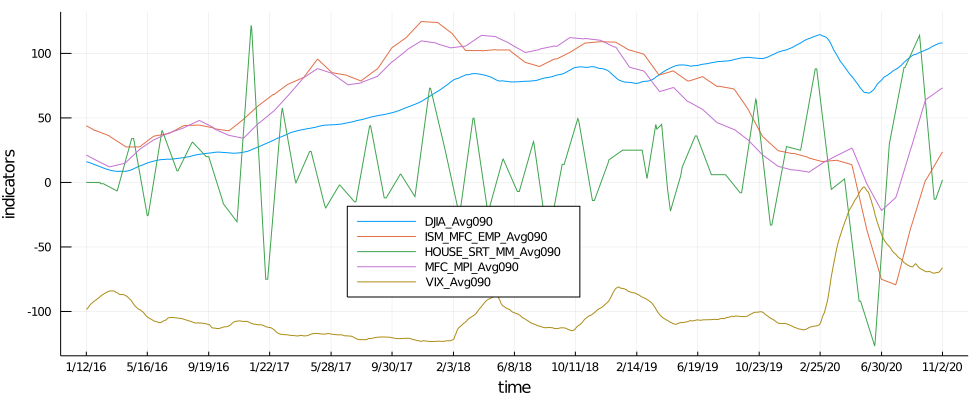

In [24]:
using Plots

record_count = size(uber_df)[1]
rows = 1:record_count
dates = format_dates( uber_df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  uber_df[rows,7] uber_df[rows,12] uber_df[rows,17] uber_df[rows,22] uber_df[rows,29]       ], # y-axis
    label    = [       columns[7]      columns[12]      columns[17]      columns[22] columns[29]   "" ],
    legend   =:bottom, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Preview Content

In [25]:
save_dataset(uber_df, dataset_file_name, "../Data/processed/");